# Brazilcovid19-ML-Project

The World Health Organization (WHO) characterized the COVID-19, caused by the SARS-CoV-2, as a pandemic on March 11, while the exponential increase in the number of cases was risking to overwhelm health systems around the world with a demand for ICU beds far above the existing capacity, with regions of Italy being prominent examples.

Brazil recorded the first case of SARS-CoV-2 on February 26, and the virus transmission evolved from imported cases only, to local and finally community transmission very rapidly, with the federal government declaring nationwide community transmission on March 20.

Until March 27, the state of São Paulo had recorded 1,223 confirmed cases of COVID-19, with 68 related deaths, while the county of São Paulo, with a population of approximately 12 million people and where Hospital Israelita Albert Einstein is located, had 477 confirmed cases and 30 associated death, as of March 23. Both the state and the county of São Paulo decided to establish quarantine and social distancing measures, that will be enforced at least until early April, in an effort to slow the virus spread.

One of the motivations for this challenge is the fact that in the context of an overwhelmed health system with the possible limitation to perform tests for the detection of SARS-CoV-2, testing every case would be impractical and tests results could be delayed even if only a target subpopulation would be tested.

Dataset

This dataset contains anonymized data from patients seen at the Hospital Israelita Albert Einstein, at São Paulo, Brazil, and who had samples collected to perform the SARS-CoV-2 RT-PCR and additional laboratory tests during a visit to the hospital.

All data were anonymized following the best international practices and recommendations. All clinical data were standardized to have a mean of zero and a unit standard deviation.

In [1]:
# importing essential libraries :
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading the dataset :
data=pd.read_excel('covid19_clinical_dataset.xlsx')

In [3]:
# lets check the first five records :
data.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.fillna(0,inplace=True)

In [6]:
# here we will take only those columns which are essential :
columns=['Patient ID','Patient age quantile','SARS-Cov-2 exam result','Patient addmited to regular ward (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to intensive care unit (1=yes, 0=no)']

In [7]:
# final data set :
data1=(data[columns])

In [10]:
data1.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)"
0,44477f75e8169d2,13,negative,0,0,0
1,126e9dd13932f68,17,negative,0,0,0
2,a46b4402a0e5696,8,negative,0,0,0
3,f7d619a94f97c45,5,negative,0,0,0
4,d9e41465789c2b5,15,negative,0,0,0


In [12]:
# lets check the shape rows and columns :
data1.shape

(5644, 6)

In [11]:
# datatypes :
data1.dtypes

Patient ID                                               object
Patient age quantile                                      int64
SARS-Cov-2 exam result                                   object
Patient addmited to regular ward (1=yes, 0=no)            int64
Patient addmited to semi-intensive unit (1=yes, 0=no)     int64
Patient addmited to intensive care unit (1=yes, 0=no)     int64
dtype: object

In [13]:
# total information of data :
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 6 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Patient ID                                             5644 non-null   object
 1   Patient age quantile                                   5644 non-null   int64 
 2   SARS-Cov-2 exam result                                 5644 non-null   object
 3   Patient addmited to regular ward (1=yes, 0=no)         5644 non-null   int64 
 4   Patient addmited to semi-intensive unit (1=yes, 0=no)  5644 non-null   int64 
 5   Patient addmited to intensive care unit (1=yes, 0=no)  5644 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 264.7+ KB


In [14]:
# lets check the null values :
data1.isnull().sum()

Patient ID                                               0
Patient age quantile                                     0
SARS-Cov-2 exam result                                   0
Patient addmited to regular ward (1=yes, 0=no)           0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0
Patient addmited to intensive care unit (1=yes, 0=no)    0
dtype: int64

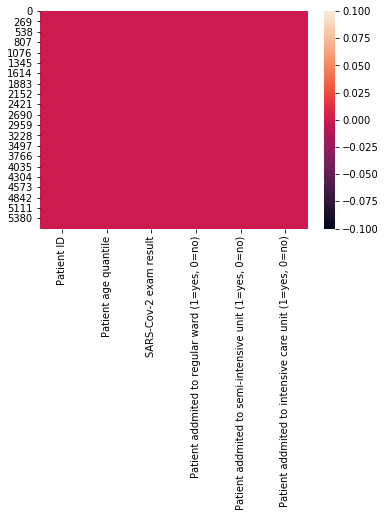

In [15]:
sns.heatmap(data1.isnull())

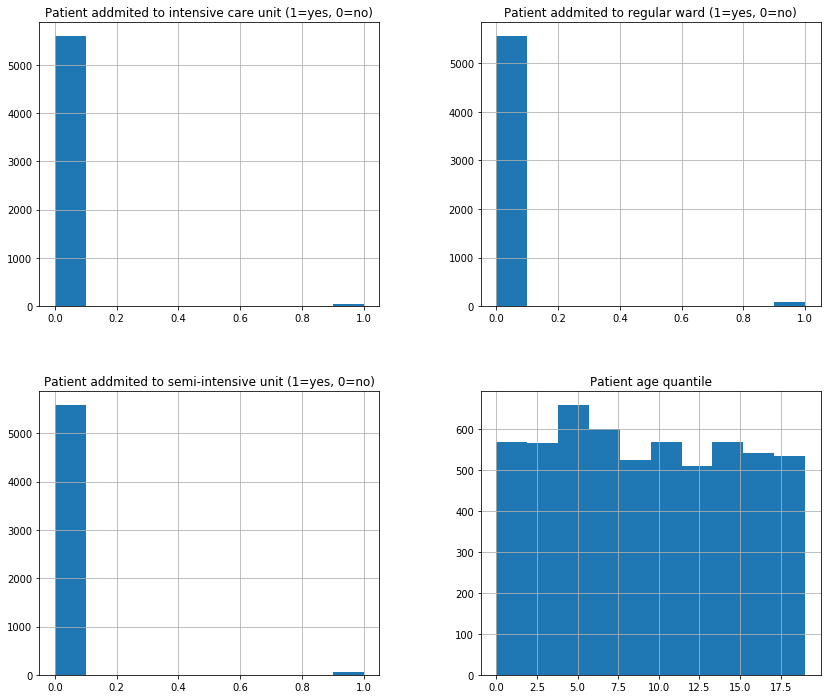

In [16]:
data1.hist(figsize=(14,12))
plt.show()

In [17]:
# lets check the column names :
data1.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)'],
      dtype='object')

In [18]:
# patients age :
data1['Patient age quantile'].value_counts()

11    380
4     366
9     359
0     334
7     319
2     315
13    313
14    299
5     294
6     281
16    279
19    275
15    269
17    263
18    259
3     251
1     234
12    197
10    190
8     167
Name: Patient age quantile, dtype: int64

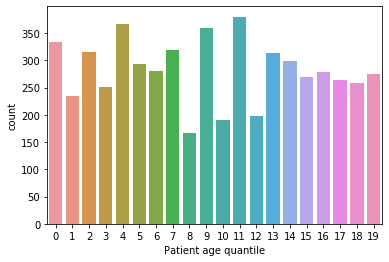

In [19]:
sns.countplot(data1['Patient age quantile'])

In [20]:
data1['SARS-Cov-2 exam result'].value_counts()

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

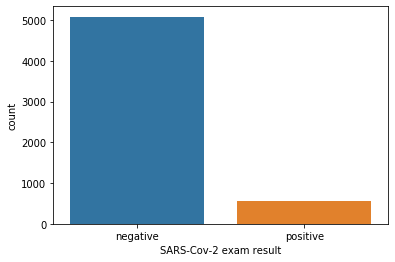

In [21]:
sns.countplot(data1['SARS-Cov-2 exam result'])

In [22]:
data1['Patient addmited to regular ward (1=yes, 0=no)'].value_counts()

0    5565
1      79
Name: Patient addmited to regular ward (1=yes, 0=no), dtype: int64

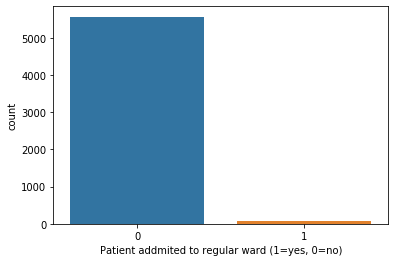

In [23]:
sns.countplot(data1['Patient addmited to regular ward (1=yes, 0=no)'])

In [24]:
data1['Patient addmited to semi-intensive unit (1=yes, 0=no)'].value_counts()

0    5594
1      50
Name: Patient addmited to semi-intensive unit (1=yes, 0=no), dtype: int64

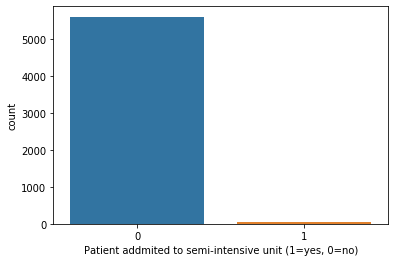

In [25]:
sns.countplot(data1['Patient addmited to semi-intensive unit (1=yes, 0=no)'])

In [26]:
data1['Patient addmited to intensive care unit (1=yes, 0=no)'].value_counts()

0    5603
1      41
Name: Patient addmited to intensive care unit (1=yes, 0=no), dtype: int64

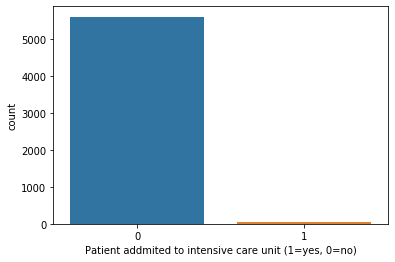

In [27]:
sns.countplot(data1['Patient addmited to intensive care unit (1=yes, 0=no)'])

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [29]:
data1['Patient ID']=le.fit_transform(data1['Patient ID'])

C:\Users\Scp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
data1.drop('Patient ID',axis=1,inplace=True)

C:\Users\Scp\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [31]:
data1.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)"
0,13,negative,0,0,0
1,17,negative,0,0,0
2,8,negative,0,0,0
3,5,negative,0,0,0
4,15,negative,0,0,0


In [32]:
data1['SARS-Cov-2 exam result']=le.fit_transform(data['SARS-Cov-2 exam result'])

C:\Users\Scp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
data1.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)"
0,13,0,0,0,0
1,17,0,0,0,0
2,8,0,0,0,0
3,5,0,0,0,0
4,15,0,0,0,0


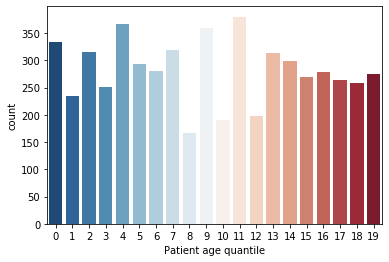

In [34]:
sns.countplot(x='Patient age quantile',data=data1,palette='RdBu_r')

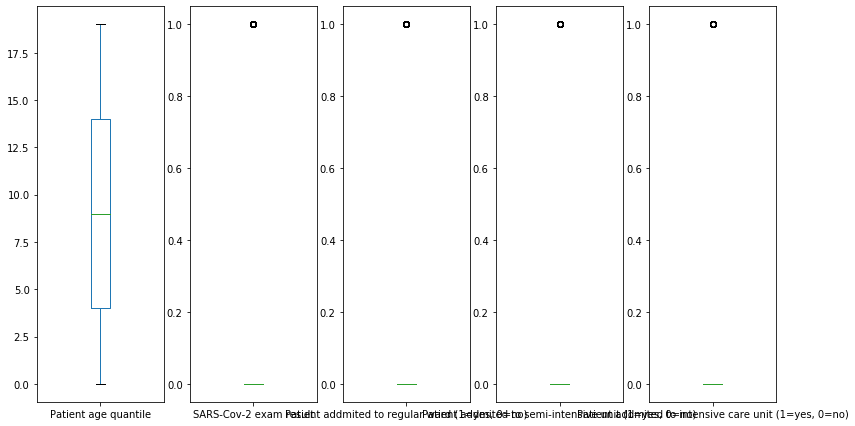

In [36]:
# checking outliers :
data1.plot(kind='box',subplots=True,layout=(2,6),fontsize=10,figsize=(16,16))
plt.show()

In [37]:
# spliting the data set :
X=data1.drop('SARS-Cov-2 exam result',axis=1)
y=data1['SARS-Cov-2 exam result']

In [38]:
# importing the libraries :
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [40]:
# here by using for loop we will check with multiple alogrithmns :
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),GaussianNB(),RandomForestClassifier(),GradientBoostingClassifier()]
for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    predm=m.predict(X_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
0.9043401240035429
[[1018    3]
 [ 105    3]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1021
           1       0.50      0.03      0.05       108

    accuracy                           0.90      1129
   macro avg       0.70      0.51      0.50      1129
weighted avg       0.87      0.90      0.86      1129



Accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_sam

C:\Users\Scp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
0.9034543844109831
[[1019    2]
 [ 107    1]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1021
           1       0.33      0.01      0.02       108

    accuracy                           0.90      1129
   macro avg       0.62      0.50      0.48      1129
weighted avg       0.85      0.90      0.86      1129



Accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
0.895482728077945
[[1002   19]
 [  99    9]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1021
           1       0.32      0.08      0.13       108

    accuracy                           0.90      1129
   macro avg       0.62      0.53      0.54      1129
weighted avg       0.85      0.9

In [41]:
# here cross validate the data :
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
cross_val_score(rfc,X,y).mean()

0.9000684720677936

# Conclusion- we will go with RandomForestClassifier. having 90% accuracy.

In [42]:
# saving the model :
import joblib
joblib.dump(rfc,'brazilcovid.pkl')

['brazilcovid.pkl']

In [43]:
# lets load the model :
model=joblib.load('brazilcovid.pkl')

In [44]:
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)